(1) By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of name_distributionand fill out the bracket with your choice again. Then please,

(a) Draw the histogram and interpret
(b) Draw Q-Q plot and interpret

(2) Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

Pt−Pt−1/Pt−1where Pt represents the stock price at time t and Pt−1 denotes the stock price at time t-1. 
What do you think about the return distribution?

Note: Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use yfinance library

In [71]:
!pip install yfinance
import pandas as pd
import yfinance as yf
df = yf.download('MSFT',
            start = "2015-01-01",
            end = "2017-01-01", 
            interval='1d', prepost=True)



[*********************100%***********************]  1 of 1 completed


In [55]:
df2 = df.copy()
df2['Return'] = df2["Close"].pct_change()*100
df2['Spread'] = df2["Close"].diff()
df2.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Spread
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,41.168922,21552500,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.443684,27913900,0.667379,0.309998
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.062580,39673900,-0.919582,-0.429996
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.459892,36447900,-1.467732,-0.680000
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.973934,29114100,1.270532,0.579998


In [56]:
df3 = df.copy()
df3["Return"] = (df3["Close"] - df3["Close"].shift(1))/df3["Close"].shift(1)*100
df3["Spread"] = df3["Close"] - df3["Close"].shift(1)
df3.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Spread
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,41.168922,21552500,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.443684,27913900,0.667379,0.309998
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.062580,39673900,-0.919582,-0.429996
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.459892,36447900,-1.467732,-0.680000
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.973934,29114100,1.270532,0.579998


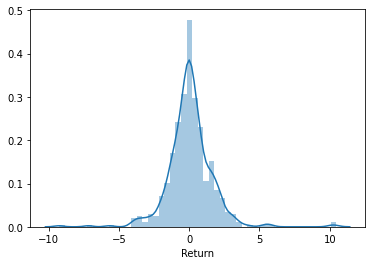

In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.distplot(df2["Return"].dropna())
plt.show()

In [64]:
df['Spread_alter'] = df.Close.diff()
df.head()

,Open,High,Low,Close,Adj Close,Volume,fark_alter,Spread_alter
Date,,,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,41.168922,21552500,NaN,NaN
2015-01-02,46.660000,47.419998,46.540001,46.759998,41.443684,27913900,0.309998,0.309998
2015-01-05,46.369999,46.730000,46.250000,46.330002,41.062580,39673900,-0.429996,-0.429996
2015-01-06,46.380001,46.750000,45.540001,45.650002,40.459892,36447900,-0.680000,-0.680000
2015-01-07,45.980000,46.459999,45.490002,46.230000,40.973934,29114100,0.579998,0.579998


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2014-12-31 to 2016-12-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          505 non-null    float64
 1   High          505 non-null    float64
 2   Low           505 non-null    float64
 3   Close         505 non-null    float64
 4   Adj Close     505 non-null    float64
 5   Volume        505 non-null    int64  
 6   fark_alter    504 non-null    float64
 7   Spread_alter  504 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 55.5 KB


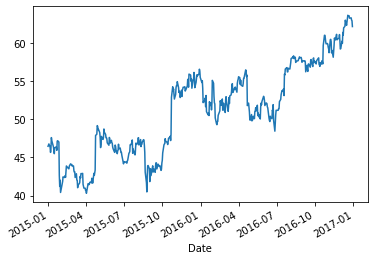

In [67]:
df.Close.plot()

In [68]:
df["2015-02":"2015-04"].head()

,Open,High,Low,Close,Adj Close,Volume,fark_alter,Spread_alter
Date,,,,,,,,
2015-02-02,40.590000,41.369999,40.230000,41.279999,36.586735,50352500,0.879997,0.879997
2015-02-03,41.630001,41.930000,41.049999,41.599998,36.870346,52082400,0.320000,0.320000
2015-02-04,41.939999,42.209999,41.360001,41.840000,37.083065,41614800,0.240002,0.240002
2015-02-05,42.220001,42.639999,41.860001,42.450001,37.623703,36548200,0.610001,0.610001
2015-02-06,42.680000,42.790001,42.150002,42.410000,37.588245,34616600,-0.040001,-0.040001


In [69]:
df["2015-02-01":"2015-02-5"].head()

,Open,High,Low,Close,Adj Close,Volume,fark_alter,Spread_alter
Date,,,,,,,,
2015-02-02,40.590000,41.369999,40.230000,41.279999,36.586735,50352500,0.879997,0.879997
2015-02-03,41.630001,41.930000,41.049999,41.599998,36.870346,52082400,0.320000,0.320000
2015-02-04,41.939999,42.209999,41.360001,41.840000,37.083065,41614800,0.240002,0.240002
2015-02-05,42.220001,42.639999,41.860001,42.450001,37.623703,36548200,0.610001,0.610001


In [70]:
df.groupby(df.index.month).mean()

,Open,High,Low,Close,Adj Close,Volume,fark_alter,Spread_alter
Date,,,,,,,,
1,48.974359,49.480769,48.291026,48.870513,43.930250,4.735594e+07,-0.165128,-0.165128
2,47.393590,47.772051,46.814615,47.335897,42.740344,3.772514e+07,-0.019487,-0.019487
3,47.650227,48.142273,47.282500,47.757955,43.279575,3.330560e+07,0.026364,0.026364
4,48.575952,49.114762,48.213333,48.760476,44.182601,3.746574e+07,0.062381,0.062381
5,49.258049,49.694634,48.880488,49.291707,44.768120,2.838482e+07,0.032927,0.032927
6,48.452273,48.889546,48.083863,48.442045,44.156804,3.382910e+07,-0.103182,-0.103182
7,49.542619,50.018572,49.225000,49.654762,45.253891,3.269157e+07,0.191905,0.191905
8,51.879318,52.289318,51.458636,51.889546,47.521492,2.826271e+07,-0.054545,-0.054545
9,50.358333,50.806429,49.991905,50.425476,46.312168,2.855971e+07,0.020952,0.020952
